In [1]:
library(SingleCellExperiment)
library(Seurat)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges

In [2]:
seurat_obj = qs::qread('../data/downsampled_anon/ds_obj.qs')
seurat_obj

An object of class Seurat 
54134 features across 10000 samples within 3 assays 
Active assay: SCT (21813 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [3]:
sce = as.SingleCellExperiment(seurat_obj, assay = 'SCT')
sce

class: SingleCellExperiment 
dim: 21813 10000 
metadata(0):
assays(2): counts logcounts
rownames(21813): Lypla1 Tcea1 ... ENSMUSG00000095742 ENSMUSG00000095041
rowData names(0):
colnames(10000): GATGCTAAGTCACGAG_1_1 GTACAGTGTCGGTGAA_3_2 ...
  ATCTTCAAGTGGACGT_1_2 GTTGCGGCACAAGTGG_5_3
colData names(9): hash.mcl.ID batch ... seurat_clusters ident
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(0):

In [4]:
# qs::qsave(sce, '/scratch/nmq407/exp_04_labelled_sce.qs')
# qs::qsave(sce, '../data/downsampled_anon/ds_obj_sce.qs')

In [5]:
library(zellkonverter)
library(basilisk)
library(scRNAseq)

In [6]:
Sys.getpid()

[1] 13467

In [8]:
roundtrip <- basiliskRun(fun = function(sce) {
     # Convert SCE to AnnData:
#      adata <- SCE2AnnData(sce)

     # Maybe do some work in Python on 'adata':
     # BLAH BLAH BLAH

     # Convert back to an SCE:
#     writeH5AD(sce, '/scratch/nmq407/exp_04_labelled_h5ad')
    writeH5AD(sce, '/scratch/nmq407/ds_obj_sce_h5ad')
}, env = zellkonverterAnnDataEnv(), sce = sce)

ℹ Using the 'counts' assay as the X matrix



In [14]:
file.copy('/scratch/nmq407/ds_obj_sce_h5ad', '../data/downsampled_anon/')

[1] TRUE

In [15]:
2

[1] 2

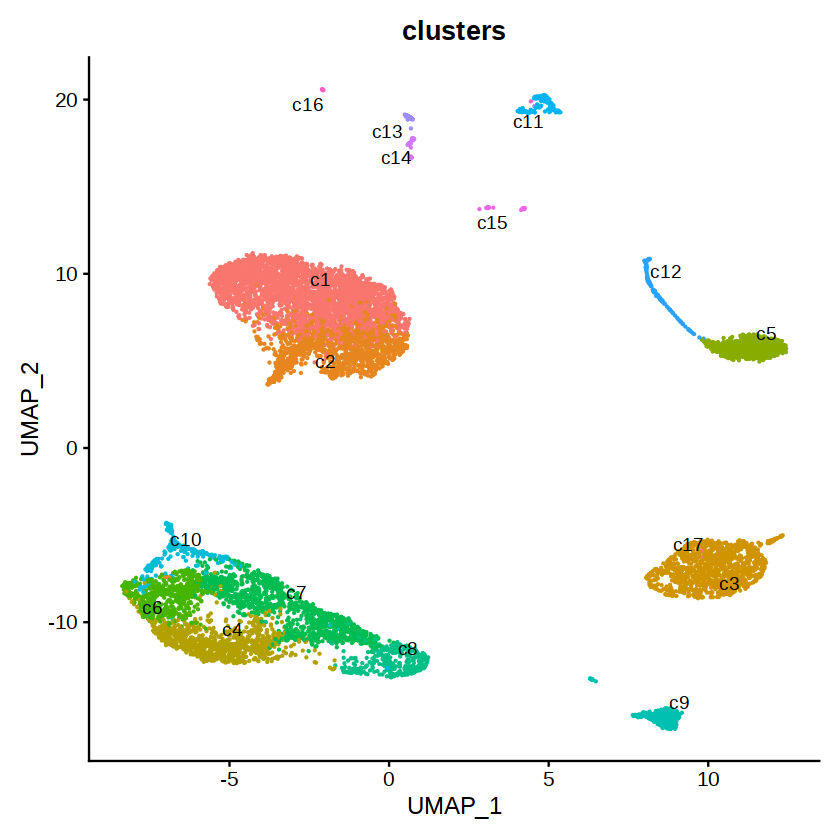

In [17]:
DimPlot(seurat_obj, reduction = "umap", group.by = "clusters", label = TRUE, repel = TRUE) + NoLegend()